# Современный анализ данных 11/01/2018

##  Методы обучение без учителя
### Алгоритмы кластеризации

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

# Для кириллицы на графиках
font = {'family': 'Verdana',
        'weight': 'normal'}
plt.rc('font', **font)

try:
    from ipywidgets import interact, IntSlider, fixed, FloatSlider
except ImportError:
    print u'Так надо'

# Ограничения метода k-средних
Запустите метод k-средних для данных ниже, расчитайте меру качества ARI по отношению к истинному разбиению в переменной `y` и меру `silhouette`.

Все должно получится идеально (ну или почти)!

In [2]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import confusion_matrix
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import silhouette_samples, silhouette_score

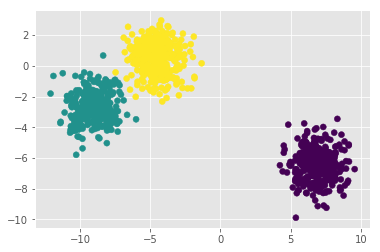

In [5]:
X, y = make_blobs(n_samples=1000, n_features=2,
                  centers=3, random_state=15)
plt.scatter(X[:,0], X[:,1], c=y)

#### Задание
Давайте чуть-чуть изменим данные.

Попробуем прокластеризовать их с помощью k-means и GMM (EM-алгоритма с гауссовскими распределениями).

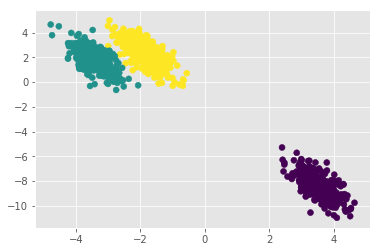

In [6]:
from sklearn.mixture import GaussianMixture
Trans = [[ 0.40834549, -0.43667341],
         [-0.10887718, 0.829]]
X_t = X.dot(Trans)
plt.scatter(X_t[:,0], X_t[:,1], c=y)

# Пищевая ценность продуктов

Загрузите файл `food.txt`. В нем содержится информация о пищевой ценности разных продуктов

* Подготовте данные к кластеризации и сделайте иерарническую кластеризацию этого набора данных.
* Изобразите дендрограмму
* Выверите число кластеров и интерпретируйте их

Почему перед применением кластеризации признки необходимо нормализовать?

In [9]:
## Your Code Here
df = pd.read_csv('data/food.txt', sep=' ')
df.head()

,Name,Energy,Protein,Fat,Calcium,Iron
0,Braised beef,340,20,28,9,2.6
1,Hamburger,245,21,17,9,2.7
2,Roast beef,420,15,39,7,2.0
3,Beefsteak,375,19,32,9,2.6
4,Canned beef,180,22,10,17,3.7


In [35]:
N=df.Name.values
N

array(['Braised beef', 'Hamburger', 'Roast beef', 'Beefsteak',
       'Canned beef', 'Broiled chicken', 'Canned chicken', 'Beef heart',
       'Roast lamb leg', 'Roast lamb shoulder', 'Smoked ham',
       'Pork roast', 'Pork simmered', 'Beef tongue', 'Veal cutlet',
       'Baked bluefish', 'Raw clams', 'Canned clams', 'Canned crabmeat',
       'Fried haddock', 'Broiled mackerel', 'Canned mackerel',
       'Fried perch', 'Canned salmon', 'Canned sardines', 'Canned tuna',
       'Canned shrimp'], dtype=object)

In [11]:
X = df.iloc[:,1:].values
X= (X-X.mean(axis=0))/X.std(axis=0)

In [20]:
X.shape

(27, 5)

In [13]:
from scipy.cluster.hierarchy import  fcluster, dendrogram, linkage

array([2, 3, 2, 2, 3, 3, 3, 4, 3, 2, 2, 2, 2, 3, 3, 3, 1, 1, 3, 3, 3, 3,
       3, 3, 5, 3, 3], dtype=int32)

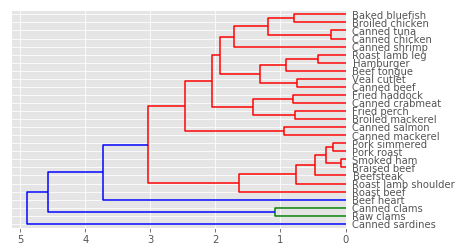

In [44]:
Z = linkage(X, method='average', metric='euclidean' )
dend = dendrogram(Z, labels=N, orientation='left')
A = fcluster(Z,5,criterion='maxclust')
A


In [45]:
fcluster(Z,3,criterion='distance')

array([2, 3, 2, 2, 3, 3, 3, 4, 3, 2, 2, 2, 2, 3, 3, 3, 1, 1, 3, 3, 3, 3,
       3, 3, 5, 3, 3], dtype=int32)

In [48]:
df.loc[:,'lable'] = A
df.head()

,Name,Energy,Protein,Fat,Calcium,Iron,lable
0,Braised beef,340,20,28,9,2.6,2
1,Hamburger,245,21,17,9,2.7,3
2,Roast beef,420,15,39,7,2.0,2
3,Beefsteak,375,19,32,9,2.6,2
4,Canned beef,180,22,10,17,3.7,3


In [52]:
t=df.groupby('lable').agg('mean')
t

,Energy,Protein,Fat,Calcium,Iron
lable,,,,,
1,57.500000,9.000000,1.000000,78.000000,5.700000
2,352.857143,18.571429,30.142857,8.714286,2.414286
3,167.187500,19.812500,8.562500,36.812500,1.725000
4,160.000000,26.000000,5.000000,14.000000,5.900000
5,180.000000,22.000000,9.000000,367.000000,2.500000


In [55]:
for c, group in df.groupby('lable'):
    print'Cluster{}', format(c)
    print group
    print '====='

Cluster{} 1
            Name  Energy  Protein  Fat  Calcium  Iron  lable
16     Raw clams      70       11    1       82   6.0      1
17  Canned clams      45        7    1       74   5.4      1
=====
Cluster{} 2
                   Name  Energy  Protein  Fat  Calcium  Iron  lable
0          Braised beef     340       20   28        9   2.6      2
2            Roast beef     420       15   39        7   2.0      2
3             Beefsteak     375       19   32        9   2.6      2
9   Roast lamb shoulder     300       18   25        9   2.3      2
10           Smoked ham     340       20   28        9   2.5      2
11           Pork roast     340       19   29        9   2.5      2
12        Pork simmered     355       19   30        9   2.4      2
=====
Cluster{} 3
                Name  Energy  Protein  Fat  Calcium  Iron  lable
1          Hamburger     245       21   17        9   2.7      3
4        Canned beef     180       22   10       17   3.7      3
5    Broiled chicken     115  

# Геоданные

In [12]:
import mpl_toolkits.basemap as bm
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

ImportError: No module named basemap

Загрузите геоданные из `geo_data.txt` (lat, lon).

Будем пытаться кластеризовать данные с помощью DBSCAN и меры [haversine](https://en.wikipedia.org/wiki/Haversine_formula)

In [106]:
df_geo = pd.read_csv('geo_data.txt', sep='\t', header=None,
                     names=['lat', 'lon'])/10000

In [107]:
df_geo.head()

,lat,lon
0,62.5983,29.7439
1,62.6146,29.7440
2,62.6144,29.7456
3,62.6004,29.7394
4,62.6018,29.7437


In [15]:
def plot_geo(lat, lon, labels=None):    
    try:
        lllat, lllon = lat.min()-1, lon.max()+1
        urlat, urlon = lat.max()+1, lon.min()-1

        plt.figure(figsize=(10, 10))

        m = bm.Basemap(
            llcrnrlon=lllon,
            llcrnrlat=lllat,
            urcrnrlon=urlon,
            urcrnrlat=urlat, 
            projection='merc',
            resolution='h'
        )

        m.drawcoastlines(linewidth=0.5)
        m.drawmapboundary(fill_color='#47A4C9', zorder=1)
        m.fillcontinents(color='#EBC4D8',lake_color='#47A4C9', zorder=2)

        parallels = np.linspace(lllat, urlat, 10)
        m.drawparallels(parallels,labels=[1,0,0,0],fontsize=10)
        # draw meridians
        meridians = np.linspace(urlon, lllon, 10)
        m.drawmeridians(meridians,labels=[0,0,0,1],fontsize=10)

        m.scatter(lon, lat, latlon=True, cmap=plt.cm.jet,
              zorder=3, lw=0, c=labels)
    except:
        print 'что-то пошло не так'
        plt.scatter(x=lon, y=lat, c=labels, cmap=plt.cm.jet)
        plt.axis('equal')

Для начала нарисуем все точки на карте

Мы будем использовать расстояние haversine - на входе требуются координаты в **радианах**. Выход тоже будет в радианах. Чтобы перейти от градусов в радианты мы можем вспомнить тригонометрию, а можем воспользоваться функцией `np.radians`.

Для кого, чтобы не терять связь с реальностью, будем иметь ввиду, что расстояние в 1 радиан на земном шаре равно примерно 6371.0088 километрам.

Создайте матрицу X с координатами в радианах

In [17]:
km_in_radian = 6371.0088
X = np.radians(df_geo.values)

Как же определить, какие параметры для DBSCAN выставлять? Наибольшую проблемы представляет параметр eps.

Будем считать, что MinPts нам дан свыше (например MinPts = 20). Воспользуемся следующим способом оценки:

* Расчитайте расстояние до k=MinPts ближайшего соседа каждой точки (класс `NearestNeighbors` и метод `kneighbors`)
* Отсортируйте полученный массив и выведите его на график
* По графику будет примерно понятно, сколько точек уйдет в шум, а сколько попадет в полноценный кластер

In [19]:
nn = NearestNeighbors()


NearestNeighbors(algorithm='ball_tree', leaf_size=30, metric='haversine',
         metric_params=None, n_jobs=1, n_neighbors=20, p=2, radius=1.0)

Определим eps мы можем начать кластеризацию

* Создайте экземпляр класса DBSCAN, кластеризуйте данные
* Выведите полученные метки кластеров и их частоты
* Изобразите координаты точек, не попавших в кластер выбросов (метка -1)

## Кластеризация текстов

#### Загрузка и предобработка данных
* Загрузите тексты статей Википедии. Удобно будет работать через pandas.DataFrame
* Первое слово - название статьи. Лучше выделить его для удобства интерпретации.
* Чтобы наши компы не загнулись возьмем 20-40%% случайных статей для анализа
* Выполнить векторизацию текстов

#### Кластеризация DBSCAN
* Воспользуйтесь методом оценки параметров min_pts и epsilon из предыдущего задания
* В качестве метрики используйте cosine distance
* Найдите кластеры и попробуйте их интерпретировать

#### Кластеризация KMEANS
* Выберите количество кластеров с помощью метрики силуэта
* Используйте MiniBatchKmeans для скорости работы
* Найдите кластеры и попробуйте их интерпретировать